In [11]:
import pandas as pd
import numpy as np

In [2]:
!unzip /content/vgsales.csv.zip

Archive:  /content/vgsales.csv.zip
  inflating: vgsales.csv             


In [12]:
data=pd.read_csv("vgsales.csv")

In [15]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Exploration data analysis

## Check most platform 

In [64]:
most_platform=data["Platform"].value_counts()

In [65]:
most_platform

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [43]:
import matplotlib.pyplot as plt

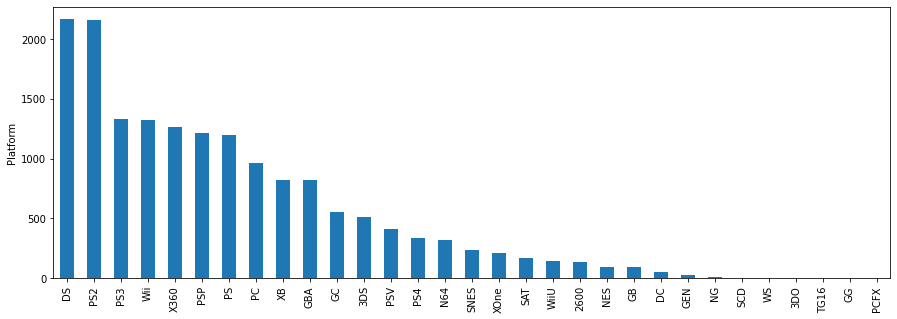

In [68]:
plt.figure(figsize=(15,5))
most_platform.plot.bar();
plt.ylabel("Total")
plt.ylabel("Platform")
plt.show()

## Check most Genre

In [70]:
most_genre=data["Genre"].value_counts()

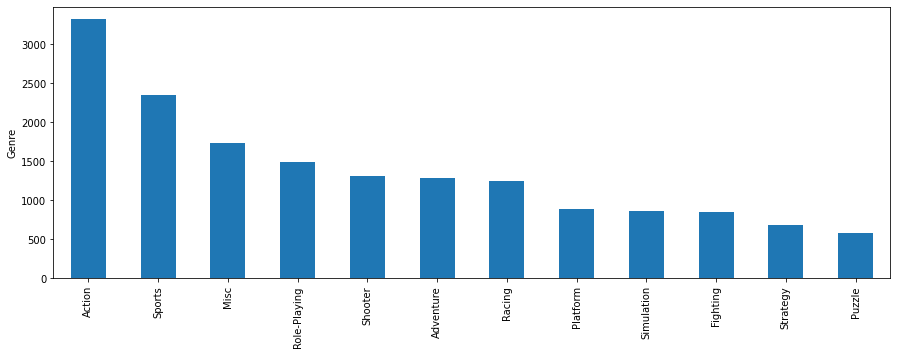

In [71]:
plt.figure(figsize=(15,5))
most_genre.plot.bar();
plt.ylabel("Total")
plt.ylabel("Genre")
plt.show()

In [72]:
import seaborn as sns

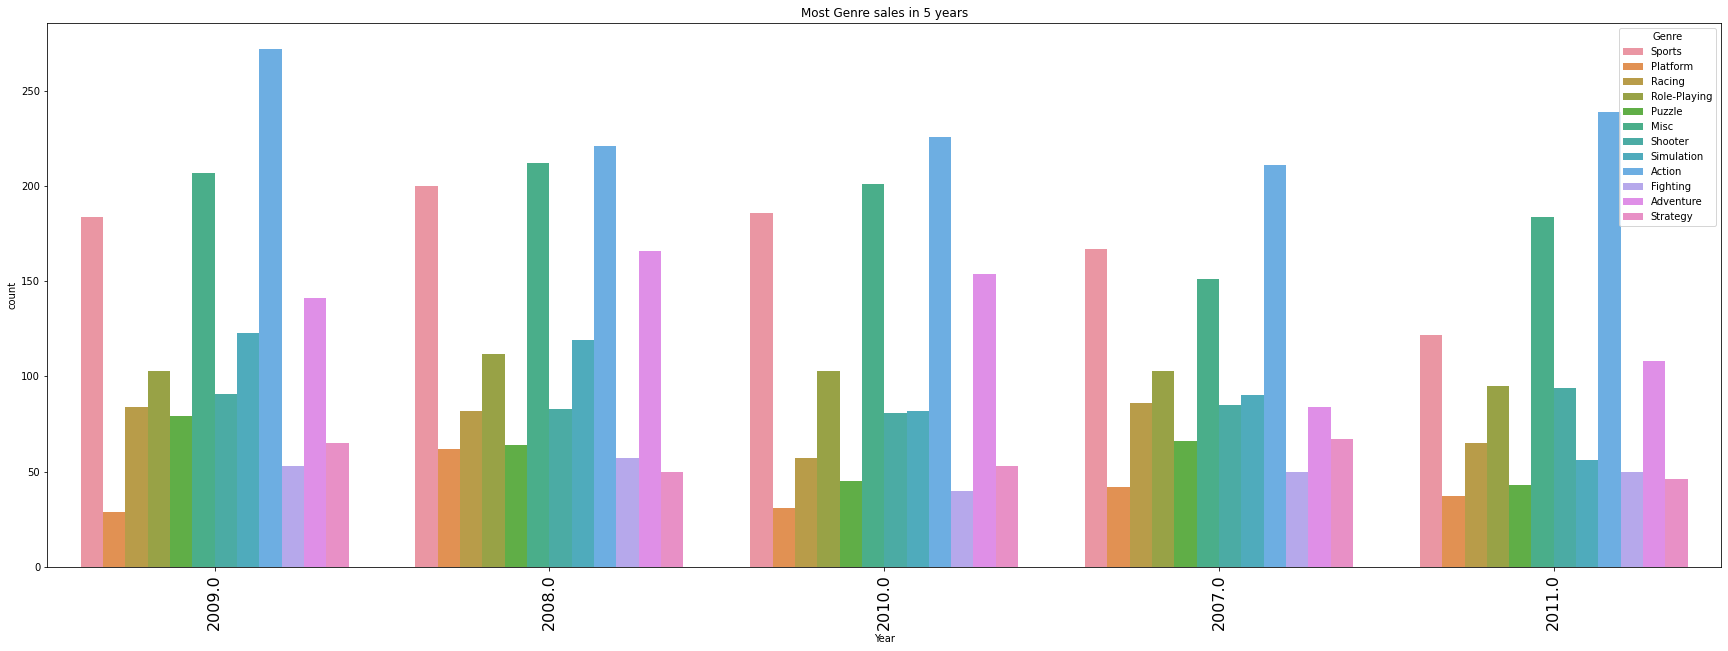

In [77]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90);
plt.title("Most Genre sales in 5 years")
plt.show()

### most 20 publisher 

In [79]:
most_publisher=data["Publisher"].value_counts()

In [80]:
most_publisher

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

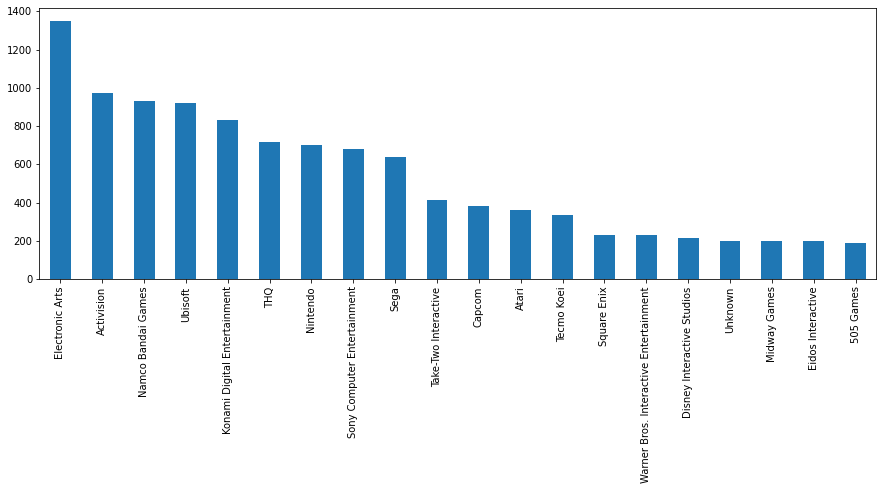

In [84]:
plt.figure(figsize=(15,5))
most_publisher.iloc[:20].plot.bar()